# The Keeling Curve in Action: to Enhance Science Data Literacy

* This file is used in actual classroom teaching and may be changed without notice as needed.
* If you have any questions or comments on this document, please email me (Kiehyun.Park@gmail.com).
* This file (document) may be freely used in public education classrooms, but for other purposes, please contact me in advance for consultation.

## Getting Started

### Module Installation

Running the cell below will install the modules required to run this notebook and check the versions of Python and related modules.

## Learning Framework: 5E Instructional Model

This notebook follows the **5E Instructional Model** (Bybee, 2006), a student-centered educational framework designed to build deep understanding of scientific concepts. This approach aligns with Next Generation Science Standards (NGSS), emphasizing science practices, particularly analyzing and interpreting data (National Research Council, 2012; NGSS Lead States, 2013).

### 1. Engage: Introduction to Keeling Curve History
- Activate prior knowledge and create interest in the Keeling Curve
- Introduce global warming as a real, measurable phenomenon
- Connect atmospheric CO₂ to everyday life and environmental issues

### 2. Explore: Hands-on Data Download and Visualization
- Hands-on analysis of actual CO₂ measurement data from Mauna Loa
- Discover patterns through data visualization
- Access authoritative data sources from the Scripps CO₂ Program
- Load and manipulate raw data from multiple monitoring stations

### 3. Explain: Understanding Patterns and Trends
- Understand the scientific explanation behind Dr. Keeling's discoveries
- Learn the physical and biological reasons for seasonal CO₂ variation
- Connect data patterns to Earth's breathing caused by hemisphere photosynthesis differences
- Examine evidence for the direct link between human activities and atmospheric CO₂

### 4. Elaborate: Advanced Analysis and Calculations
- Compare CO₂ measurements across multiple global locations
- Analyze different measurement methods and their reliability
- Perform detailed temporal analysis of CO₂ concentration trends
- Apply findings to understanding broader climate science concepts

### 5. Evaluate: Student-Designed Investigations
- Assess understanding through data analysis and interpretation
- Create evidence-based arguments grounded in quantitative data
- Evaluate the importance of long-term scientific monitoring
- Reflect on how data literacy informs scientific decision-making

---


In [1]:
# Define required modules (version can be specified)
packages_str =  "numpy, pandas, matplotlib, cartopy, ffmpeg, requests, version_information"

In [2]:
required_packages = packages_str.split(", ")

import importlib, sys, subprocess, re
import warnings
warnings.filterwarnings("ignore")

print("--- Package Check and Installation ---")
packages_for_version_check = []

for pkg_spec in required_packages:
    match = re.match(r"([a-zA-Z0-9_\-]+)", pkg_spec)
    if not match:
        continue
    
    base_pkg_name = match.group(1)
    packages_for_version_check.append(base_pkg_name)
    
    try:
        if importlib.util.find_spec(base_pkg_name) is None:
            print(f"Installing: {pkg_spec}")
            subprocess.run([sys.executable, '-m', 'pip', 'install', pkg_spec, '-q'], 
                         check=True, capture_output=True)
            print(f"✓ {pkg_spec} installed successfully")
        else:
            print(f"✓ {base_pkg_name} already installed")
    except Exception as e:
        print(f"✗ Failed to install {pkg_spec}: {e}")

print("\n--- Loading version_information ---")
try:
    %load_ext version_information
    version_check_str = ", ".join(packages_for_version_check)
    vv = %version_information {version_check_str}
    print("✓ Package version check completed")
except Exception as e:
    print(f"✗ Failed to load version_information: {e}")

import time
print(f"\nGenerated at: {time.strftime('%Y-%m-%d %H:%M:%S')}")

--- Package Check and Installation ---
✓ numpy already installed
✓ pandas already installed
✓ matplotlib already installed
✓ cartopy already installed
✓ ffmpeg already installed
✓ requests already installed
✓ version_information already installed

--- Loading version_information ---
✓ Package version check completed

Generated at: 2026-02-16 10:54:29


### Font Installation (Optional - for non-Latin characters)

If you're running this Jupyter notebook on Google Colab and need to display non-Latin characters (e.g., Korean, Chinese, Japanese) in matplotlib graphs, you may need to install appropriate fonts.

To run the code below, remove the comments if present. Then you'll need to restart the runtime for matplotlib to use the fonts.

In [3]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

#### Restart Runtime

On Google Colab, after running the cell above, you must perform the following steps...

* [Menu]-[Runtime]-[Restart session]

* [Menu]-[Runtime]-[Run before]

In [4]:
# Configure font settings for different operating systems
import platform
import matplotlib.pyplot as plt

if platform.system() == 'Windows':
    # Font settings for Windows
    plt.rcParams['font.family'] = ['Malgun Gothic', 'Microsoft YaHei', 'DejaVu Sans']
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = ['AppleGothic', 'Helvetica', 'DejaVu Sans']
else:  # Linux
    plt.rcParams['font.family'] = ['NanumGothic', 'DejaVu Sans']

plt.rcParams['axes.unicode_minus'] = False  # Fix minus sign display error

### Create Data Storage Folder

When creating a data storage folder in a code cell, you can use '!' to execute shell commands:
> !mkdir folder_name

To create a data storage folder using pathlib (operating system independent), you can do the following:

In [5]:
proj_dir = "The_Keeling_Curve_in_Action"
import os
from pathlib import Path
BASEPATH = Path("./").resolve()  # Absolute path of current working directory

# Create folder if it doesn't exist, otherwise print that it exists
if not (BASEPATH/proj_dir).exists():
    os.mkdir(str(BASEPATH/proj_dir))
    print (f"{str(BASEPATH/proj_dir)} is created...")  # Message when folder is created
else :
    print (f"{str(BASEPATH/proj_dir)} already exists...")  # Message when folder already exists

C:\Users\Kiehyun\Desktop\KBox\MyR\ISCCE2026\appendix\The_Keeling_Curve_in_Action already exists...


## The Warming Earth

<img src="https://scnc.or.kr/images/fs/content/sub02/ipcc_img1.png" width="600">

Global warming and $\rm{CO_{2}}$ concentration changes have a direct and strong causal relationship. A linear relationship has been scientifically confirmed where global warming accelerates as atmospheric carbon dioxide concentration increases. Carbon dioxide acts as a greenhouse gas in the atmosphere, preventing heat emitted from Earth's surface from escaping into space. As greenhouse gas concentrations have risen sharply due to fossil fuel use, energy is prevented from escaping Earth, intensifying the abnormal warming phenomenon known as global warming.

As of 2023, atmospheric carbon dioxide concentration has exceeded 420 ppm. This is the first time since the "Pliocene" era 3 million years ago that such levels have been reached, when Earth's temperature was 2-3°C higher than present and sea levels were 9-18m higher. Since industrialization, $\rm{CO_{2}}$ concentration has risen from 280 ppm to 420 ppm. The World Meteorological Organization (WMO) has stated that carbon dioxide concentration is increasing at the fastest rate in human history. Atmospheric carbon dioxide concentration from 2014-2019 increased by 20% compared to the previous five years.

Recent research analyzing data from 1850-2023 has confirmed a linear relationship between atmospheric carbon dioxide concentration and temperature rise. This means that temperature rises proportionally as carbon dioxide concentration increases. While Earth's average temperature rose by 1.1℃ over approximately 150 years since 1850, between 2011 and 2015 it rose by 0.2℃, showing the rapid acceleration of warming.

Global warming is creating a vicious cycle that accelerates $\rm{CO_{2}}$ concentration increases. Due to global warming, the carbon absorption capacity of natural ecosystems such as forests and oceans is declining, leading to a vicious cycle that accelerates carbon dioxide concentration increases. Additionally, as Arctic permafrost melts, it releases methane and carbon dioxide into the atmosphere, creating a positive feedback phenomenon. The WMO has designated greenhouse gas concentration as one of the four key climate change indicators. As atmospheric greenhouse gas concentrations increase, the atmosphere and oceans warm, snow and ice decrease, and sea level rise and ocean acidification progress.

<iframe width="560" height="315" src="https://www.youtube.com/embed/aL0Nv4zJgNg?si=YxJ60HnklfUZvvVw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

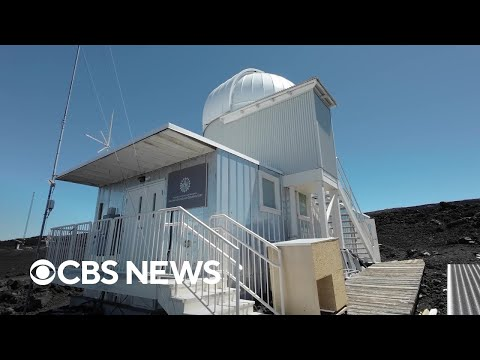

In [6]:
from IPython.display import YouTubeVideo

YouTubeVideo('aL0Nv4zJgNg', width=560, height=315)

### The Keeling Curve - Decisive Evidence of Global Warming Research

In **March 1958**, **Dr. Charles David Keeling** from the University of California, San Diego, began measuring atmospheric carbon dioxide concentration at the Mauna Loa Observatory in Hawaii. This was humanity's first scientific attempt at **continuous and precise $\rm{CO_{2}}$ concentration measurements in a remote location**.

Dr. Keeling chose Mauna Loa because of its geographical characteristics: **elevation of 3,400m** and location **in the middle of the Pacific Ocean**. This location provided optimal conditions for measuring **representative values of Earth's entire atmosphere** by **minimizing the influence of urban pollution and local emission sources**.

Dr. Keeling used an **Infrared Gas Analyzer**, which was innovative at the time. This instrument could measure concentration with **±0.3 ppm precision** by utilizing $\rm{CO_{2}}$'s property of absorbing specific infrared wavelengths.

Most importantly, Dr. Keeling established **standardized measurement techniques**. By measuring at the same time and using the same method every day, he ensured **data consistency and reliability**. This rigorous methodology is still used today as a **standard model for scientific monitoring**.

1. Seasonal Variation Pattern: He discovered that atmospheric $\rm{CO_{2}}$ concentration shows **periodic variation of about 6 ppm annually**. This was due to **photosynthesis and respiration of Northern Hemisphere plants**. Dr. Keeling named this **Earth's breathing**.
- **May**: Maximum concentration (CO2 accumulation from plant respiration during winter)
- **October**: Minimum concentration (CO2 absorption from summer photosynthesis)

2. Long-term Rising Trend: More importantly, he observed **continuous year-over-year $\rm{CO_{2}}$ concentration increase**. The measurements that started at **315 ppm in 1958** showed a pattern of steady annual increase.

3. Direct Evidence of Human Activity: The Keeling Curve was the first scientific proof of **the direct impact of fossil fuel combustion on atmospheric $\rm{CO_{2}}$ concentration**. Within just a few years of starting measurements, a **clear correlation between industrial activity and $\rm{CO_{2}}$ concentration increase** became evident.

4. Discovery of Airborne Fraction: Through Dr. Keeling's research, the concept of "Airborne Fraction" was established, showing that **approximately 55% of $\rm{CO_{2}}$ emitted from fossil fuels remains in the atmosphere**. While the remaining 45% is absorbed by oceans and terrestrial ecosystems, the fact that **more than half accumulates in the atmosphere** was revealed.

5. 67 Years of Continuous Measurement: **As of 2025, for 67 years**, the Keeling Curve has been interrupted only twice. This **long-term continuous observation** is the greatest scientific value of the Keeling Curve. By showing a **clear trend over decades** rather than short-term fluctuations, it presented irrefutable evidence of global warming's reality.
- **1964**: 8-month interruption due to government budget cuts
- **2022**: Temporary interruption due to Mauna Loa volcanic eruption

6. Measurement Results to Date:
- **1958**: 315 ppm (measurement start)
- **2018**: 406 ppm 
- **2024**: 422.5 ppm (all-time high)
- **Annual average increase rate**: 2.48±0.26 ppm
- **Compared to pre-industrial**: 52% increase (278 ppm → 422.5 ppm)

7. Historical Significance: Interestingly, Keeling's 1960 paper showed **relatively low citation rates until the 2000s**. This was due to:[5]
- The **"global cooling" discourse** was mainstream in the 1950s-1970s
- **Undervaluation of "routine observations"**
- The **term "Keeling Curve" itself** was used more widely than the paper

8. Modern Reevaluation: Since the 2000s, as climate change became a global concern, the Keeling Curve has been reevaluated as **one of the most important scientific studies of the 20th century**. The American Chemical Society designated the Keeling Curve as a **National Chemical Historic Landmark** in 2015.

9. Legacy of the Keeling Curve: Dr. Keeling's research methodology is now being applied to other fields. A 2023 study published in Environmental Science & Technology proposed that **the Keeling Curve approach is needed for monitoring emerging pollutants**, showing that Keeling's principles are still recognized as a **standard model** for scientific monitoring.

The Keeling Curve continuously demonstrates its importance beyond simple data collection as **the foundation of climate science** and **scientific basis for environmental policy**. Through **steady and accurate measurement over 67 years**, the Keeling Curve, which clearly showed that global warming is a **measurable reality** rather than an abstract theory, is evaluated as **the most important research** providing scientific grounds for humanity's response to climate change.

### Related Papers

* Keeling, C. D. (1958). The concentration and isotopic abundances of atmospheric carbon dioxide in rural areas. *Geochimica et cosmochimica acta*, 13(4), 322-334.

* Keeling, C. D. (1960). The concentration and isotopic abundances of carbon dioxide in the atmosphere. *Tellus*, 12(2), 200-203.

* Keeling, C. D., Bacastow, R. B., Bainbridge, A. E., Ekdahl Jr, C. A., Guenther, P. R., Waterman, L. S., & Chin, J. F. (1976). Atmospheric carbon dioxide variations at Mauna Loa observatory, Hawaii. *Tellus*, 28(6), 538-551.


#### (Assignment)

Download the original papers above and use "generative AI" to complete the code below that summarizes the papers in at least 3000 characters.

When using "generative AI", please provide the model name and prompt used.

In [7]:
# (Assignment) Complete the code below and submit
thesis1_apa = "Thesis 1 APA citation goes here."    # Example: Smith, J. (2020). Paper title. Journal name, Volume(issue), pages.
thesis1_summary = '''Summary content goes here. '''   # Example: This paper discusses research on the Hubble-Lemaitre law.
LLM_name_for_thesis1 = "Name of language model used for summary"     # Example: GPT-3
LLM_prompt_for_thesis1 = "Please write the prompt used for the summary."    # Example: "Explain the Hubble-Lemaitre law."

print("\n--- Paper Summary ---")
print(f"Paper: {thesis1_apa}")
print(f"Summary:\n",thesis1_summary)
print(f"Language model used for summary: {LLM_name_for_thesis1}")
print(f"Prompt used for summary: {LLM_prompt_for_thesis1}")


thesis2_apa = "Thesis 2 APA citation goes here."    
thesis2_summary = '''Summary content goes here. '''   
LLM_name_for_thesis2 = "Name of language model used for summary"     
LLM_prompt_for_thesis2 = "Please write the prompt used for the summary."    

print("\n--- Paper Summary ---")
print(f"Paper: {thesis2_apa}")
print(f"Summary:\n",thesis2_summary)
print(f"Language model used for summary: {LLM_name_for_thesis2}")
print(f"Prompt used for summary: {LLM_prompt_for_thesis2}")

thesis3_apa = "Thesis 3 APA citation goes here."    
thesis3_summary = '''Summary content goes here. '''   
LLM_name_for_thesis3 = "Name of language model used for summary"     
LLM_prompt_for_thesis3 = "Please write the prompt used for the summary."    

print("\n--- Paper Summary ---")
print(f"Paper: {thesis3_apa}")
print(f"Summary:\n",thesis3_summary)
print(f"Language model used for summary: {LLM_name_for_thesis3}")
print(f"Prompt used for summary: {LLM_prompt_for_thesis3}")



--- Paper Summary ---
Paper: Thesis 1 APA citation goes here.
Summary:
 Summary content goes here. 
Language model used for summary: Name of language model used for summary
Prompt used for summary: Please write the prompt used for the summary.

--- Paper Summary ---
Paper: Thesis 2 APA citation goes here.
Summary:
 Summary content goes here. 
Language model used for summary: Name of language model used for summary
Prompt used for summary: Please write the prompt used for the summary.

--- Paper Summary ---
Paper: Thesis 3 APA citation goes here.
Summary:
 Summary content goes here. 
Language model used for summary: Name of language model used for summary
Prompt used for summary: Please write the prompt used for the summary.


## Data Mining

### 🔍 **ENGAGE & EXPLORE** - Discovering Data Patterns

In this phase, we will work with **actual atmospheric CO₂ measurement data from the Scripps CO₂ Program**. Rather than reading about global warming in textbooks, you will directly analyze real scientific data collected continuously since 1958. This hands-on approach mirrors how climate scientists work with data in real-world research.

**Learning Objectives for Phase 1:**
- Understand Earth's atmospheric composition and the critical role of CO₂
- Load and manipulate real scientific measurement data using Python
- Explore the structure and quality of historical climate monitoring data
- Identify seasonal patterns and long-term trends in atmospheric CO₂ concentration
- Apply data literacy skills to interpret what scientists actually observe

**Key Concepts:**
- **Remote Station Monitoring**: Why measuring at Mauna Loa provides representative global data
- **Data Quality**: Understanding measurement precision and data gaps
- **Temporal Patterns**: Discovering both short-term (seasonal) and long-term (decadal) variations
- **Data-Driven Evidence**: Building arguments based on quantitative analysis rather than speculation

---


### Atmospheric Composition

Looking at Earth's atmospheric composition, water vapor comprises approximately 1% to 4% of the total atmosphere. However, the amount of water vapor shows very large variability depending on time and geographical location. Because this high variability in water vapor content also affects the relative proportions of other atmospheric gas components, when discussing atmospheric composition, it is common to describe it based on the composition of dry air excluding water vapor. Meanwhile, carbon dioxide, which ranks fourth in atmospheric abundance, is receiving global attention as one of the main causes of current global warming, and its concentration in the atmosphere has been continuously increasing due to increased human activity since industrialization, making it a core element of environmental issues.

### $\rm{CO_{2}}$ Concentration Observation Data

You can download data observed at Mauna Loa in Hawaii from the link below:
https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv

To download monthly $\rm{CO_{2}}$ concentration data from the given URL, you can execute Linux commands in a cell by putting an exclamation mark (!) in front. Entering the URL after the wget command will save the CSV file to the current working directory.

The code below creates a pie chart showing the composition of dry air in the image above. The results demonstrate that compared to the actual composition, small components are exaggerated in the visualization.

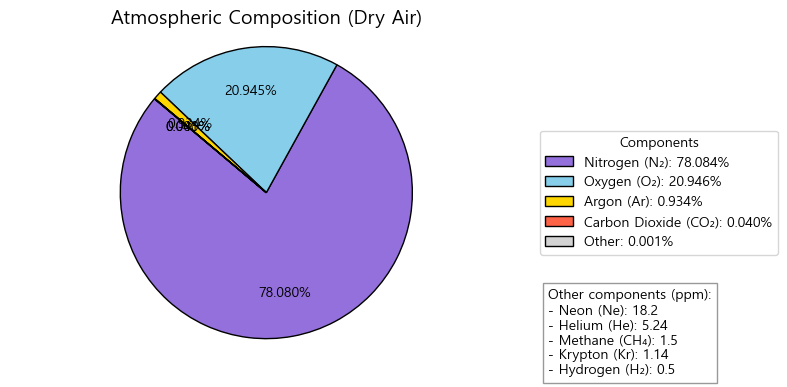

In [8]:
import matplotlib.pyplot as plt

labels = [
    'Nitrogen (N₂): 78.084%',
    'Oxygen (O₂): 20.946%',
    'Argon (Ar): 0.934%',
    'Carbon Dioxide (CO₂): 0.040%',
    'Other: 0.001%'
]
sizes = [
    78.084,   # N2
    20.946,   # O2
    0.934,    # Ar
    0.040,    # CO2
    0.001     # All others
]
colors = ['mediumpurple', 'skyblue', 'gold', 'tomato', 'lightgrey']

fig, ax = plt.subplots(figsize=(8, 4))

patches, texts, autotexts = ax.pie(
    sizes,
    colors=colors,
    autopct='%1.3f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 10},
    pctdistance=0.7,
    labeldistance=0.95
)

ax.legend(
    patches, labels, loc='center left',
    bbox_to_anchor=(1.02, 0.5), fontsize=10, title="Components"
)

others_text = (
    "Other components (ppm):\n"
    "- Neon (Ne): 18.2\n"
    "- Helium (He): 5.24\n"
    "- Methane (CH₄): 1.5\n"
    "- Krypton (Kr): 1.14\n"
    "- Hydrogen (H₂): 0.5"
)
plt.text(1.05, 0.2, others_text, fontsize=10, va='top', ha='left',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'), transform=ax.transAxes)

ax.set_title('Atmospheric Composition (Dry Air)', fontsize=14)
ax.axis('equal')
plt.tight_layout()

# Save figure in both PNG and PDF formats
plt.savefig('../images/02_atmospheric_composition.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/02_atmospheric_composition.pdf', bbox_inches='tight')

plt.show()

### Scripps CO₂ Program

The Scripps CO₂ Program (https://scrippsco2.ucsd.edu/), operated by the Scripps Institution of Oceanography at UC San Diego, is the world's oldest and most reliable atmospheric carbon dioxide measurement system. Started in 1958 by Dr. Charles David Keeling, this program has been conducting continuous CO₂ concentration measurements for over 60 years, centered at Mauna Loa Observatory in Hawaii.

The data collected at this observatory produced the famous 'Keeling Curve,' which is regarded as one of the most important pieces of scientific evidence showing humanity's impact on Earth's climate. The data clearly demonstrates that atmospheric CO₂ concentration has continuously increased from 280 ppm before the Industrial Revolution to over 420 ppm today.

The Scripps CO₂ Program conducts observations at multiple sites worldwide including Mauna Loa, the South Pole, and Samoa. Through precise analytical techniques and strict quality control procedures, it produces internationally recognized standard data. This data provides crucial scientific evidence for climate change research, understanding carbon cycles, and formulating international climate policies.


### Mauna Loa Observatory Information

For information about Mauna Loa Observatory, please refer to the following link:
https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html

The code below visualizes the locations of atmospheric observation stations operated by this institution.

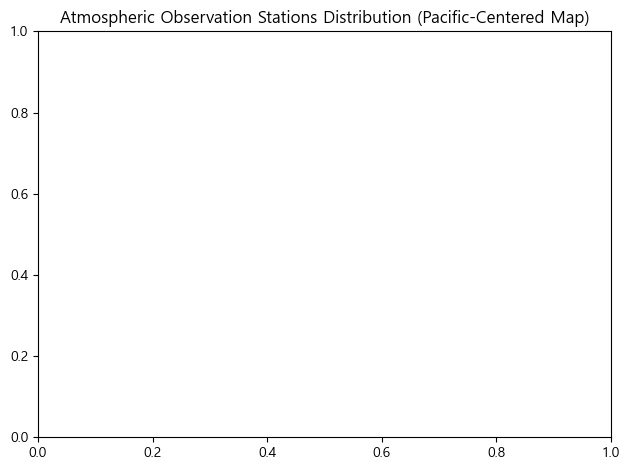

In [9]:
plt.title('Atmospheric Observation Stations Distribution (Pacific-Centered Map)', fontsize=12)
plt.tight_layout()

# Save figure in both PNG and PDF formats
plt.savefig('../images/01_atmospheric_stations_map.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/01_atmospheric_stations_map.pdf', bbox_inches='tight')

plt.show()


### CO₂ Concentration Observation Data

You can download data observed at Mauna Loa in Hawaii from the link below:
https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv

To download monthly CO₂ concentration data from the given URL, you can execute Linux commands by prefixing with an exclamation mark (!) in a cell. By entering the URL after the wget command, the CSV file will be saved in the current working directory.

In [10]:
fname = "monthly_in_situ_co2_mlo.csv"

# Fix the wget command - remove the 'f' prefix from the output path
import subprocess
import sys

try:
    # Using wget (if available)
    result = subprocess.run([
        'wget',
        'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv',
        '-O', str(BASEPATH/proj_dir/fname)
    ], check=True, capture_output=True, text=True)
    print(f"Downloaded {fname} successfully using wget")
except (subprocess.CalledProcessError, FileNotFoundError):
    # Fallback to requests if wget is not available
    print("wget not available, using requests...")
    import requests

    url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"

    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()

        with open(str(BASEPATH/proj_dir/fname), 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)

        print(f"Downloaded {fname} successfully using requests")
    except Exception as e:
        print(f"Download failed: {e}")

wget not available, using requests...
Downloaded monthly_in_situ_co2_mlo.csv successfully using requests


* Thoning, K. W., Tans, P. P., & Komhyr, W. D. (1989). Atmospheric carbon dioxide at Mauna Loa Observatory: 2. Analysis of the NOAA GMCC data, 1974–1985. *Journal of Geophysical Research: Atmospheres*, 94(D6), 8549-8565.


In [11]:
thesis4_apa = "Thesis 4 APA citation goes here."    
thesis4_summary = '''Summary content goes here. '''   
LLM_name_for_thesis4 = "Name of language model used for summary"     
LLM_prompt_for_thesis4 = "Please write the prompt used for the summary."    

print("\n--- Paper Summary ---")
print(f"Paper: {thesis4_apa}")
print(f"Summary:\n",thesis4_summary)
print(f"Language model used for summary: {LLM_name_for_thesis4}")
print(f"Prompt used for summary: {LLM_prompt_for_thesis4}")


--- Paper Summary ---
Paper: Thesis 4 APA citation goes here.
Summary:
 Summary content goes here. 
Language model used for summary: Name of language model used for summary
Prompt used for summary: Please write the prompt used for the summary.


* If you are using Colab, you can check the downloaded file in the [Files] window on the right.
* This code checks the operating system and prints the file list in the corresponding directory.

In [12]:
import platform
import os
import subprocess

if platform.system() == 'Windows':
    # Settings to prevent Korean character corruption on Windows
    try:
        # Set cmd encoding to UTF-8
        result = subprocess.run(['chcp', '65001'], shell=True, capture_output=True, text=True)
        # Execute dir command (with UTF-8 encoding)
        result = subprocess.run(f'dir "{BASEPATH/proj_dir}"', shell=True, capture_output=True, text=True, encoding='utf-8')
        print(result.stdout)
        if result.stderr:
            print("Error:", result.stderr)
    except Exception as e:
        print(f"Error executing command: {e}")
        # Alternative: Use PowerShell
        try:
            ps_command = f'Get-ChildItem -Path "{BASEPATH/proj_dir}" | Format-Table Name, Length, LastWriteTime -AutoSize'
            result = subprocess.run(['powershell', '-Command', ps_command], capture_output=True, text=True, encoding='utf-8')
            print(result.stdout)
        except Exception as e2:
            print(f"Error executing PowerShell: {e2}")
else:
    # Unix/Linux/macOS
    !ls -l {BASEPATH/proj_dir}

 Volume in drive C has no label.
 Volume Serial Number is 0616-DFA2

 Directory of C:\Users\Kiehyun\Desktop\KBox\MyR\ISCCE2026\appendix\The_Keeling_Curve_in_Action

2026-02-14  오후 07:12    <DIR>          .
2026-02-14  오후 07:12    <DIR>          ..
2026-02-16  오전 10:54            85,878 monthly_in_situ_co2_mlo.csv
2026-02-15  오후 04:46            76,943 monthly_merge_co2_ptb.csv
2026-02-15  오후 04:46            81,407 monthly_merge_co2_spo.csv
               3 File(s)        244,228 bytes
               2 Dir(s)  77,854,449,664 bytes free



If you create a list of filenames as shown below, you can easily retrieve filenames when you need file I/O later.

In [13]:
# Code to check the list of .csv files in the specified folder using pathlib
from pathlib import Path
fpaths = sorted(list((BASEPATH/proj_dir).glob('*.csv')))
print(f"fpaths: {fpaths}")  # Print the list of full paths of .csv files
print(f"len(fpaths): {len(fpaths)}")  # Print the number of .csv files

fpaths: [WindowsPath('C:/Users/Kiehyun/Desktop/KBox/MyR/ISCCE2026/appendix/The_Keeling_Curve_in_Action/monthly_in_situ_co2_mlo.csv'), WindowsPath('C:/Users/Kiehyun/Desktop/KBox/MyR/ISCCE2026/appendix/The_Keeling_Curve_in_Action/monthly_merge_co2_ptb.csv'), WindowsPath('C:/Users/Kiehyun/Desktop/KBox/MyR/ISCCE2026/appendix/The_Keeling_Curve_in_Action/monthly_merge_co2_spo.csv')]
len(fpaths): 3


Let's check the file contents using shell commands. This CSV file has data separated by tabs ("\t"), and we can confirm it contains data for approximately thousands of measurements over decades.

In [14]:
import os
import subprocess
import sys
import platform

# Example code to print only the first part of a text file depending on the operating system
n_lines = 80  # Number of lines to print

print(f"File content output (first {n_lines} lines):")
print("="*60)

try:
    if platform.system() == 'Windows':  # Windows
        # Use PowerShell command
        ps_command = f'Get-Content "{fpaths[0]}" -TotalCount {n_lines} -Encoding UTF8'
        result = subprocess.run(['powershell', '-Command', ps_command],
                              capture_output=True, text=True, encoding='utf-8')
        if result.returncode == 0:
            print(result.stdout)
        else:
            print(f"PowerShell command execution error: {result.stderr}")
            raise Exception("PowerShell command failed")

    elif platform.system() in ['Linux', 'Darwin']:  # Linux/Mac
        # Use head command
        result = subprocess.run(['head', '-n', str(n_lines), str(fpaths[0])],
                              capture_output=True, text=True, encoding='utf-8')
        if result.returncode == 0:
            print(result.stdout)
        else:
            print(f"head command execution error: {result.stderr}")
            raise Exception("head command failed")

    else:
        # For other operating systems, implement in pure Python
        raise Exception(f"Unsupported operating system: {platform.system()}")

except Exception as e:
    print(f"OS-specific command execution failed: {e}")
    print("Attempting to read file with pure Python...")
    print("-"*40)

    # Pure Python implementation (OS-independent)
    try:
        with open(fpaths[0], encoding='utf-8') as f:
            for i, line in enumerate(f):
                if i >= n_lines:
                    break
                print(f"{i+1:3d}: {line.rstrip()}")
    except UnicodeDecodeError:
        # If UTF-8 reading fails, try another encoding
        try:
            with open(fpaths[0], encoding='cp949') as f:
                for i, line in enumerate(f):
                    if i >= n_lines:
                        break
                    print(f"{i+1:3d}: {line.rstrip()}")
        except Exception as e2:
            print(f"File reading failed (both UTF-8 and CP949 failed): {e2}")
    except Exception as e:
        print(f"File reading failed: {e}")

print("="*60)

File content output (first 80 lines):
"-------------------------------------------------------------------------------------------"
" Atmospheric CO2 concentrations (ppm) derived from in situ air measurements                "
" at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m      "
" Since December 2022 sampling has temporarily been relocated to MaunuaKea, Hawaii          "
" Latitude 19.8°N Longitude 155.5°W Elevation 4145m      "
"                                                                                           "
" Source: R. F. Keeling, S. J. Walker, S. C. Piper and A. F. Bollenbacher                   "
" Scripps CO2 Program ( http://scrippsco2.ucsd.edu )                                        "
" Scripps Institution of Oceanography (SIO)                                                 "
" University of California                                                                  "
" La Jolla, California USA 92093-0244                    

## Data Preprocessing

### DataFrame from CSV File

The given CSV file has a special structure, so the standard pd.read_csv() function cannot be used as is:
* Skip header: The first 57 rows contain metadata and explanations about the data, not actual data
* Delimiter: Data is separated by commas (,)
* Specify column names: Since the original file does not have appropriate column names, they are manually specified as follows: ['Year', 'Month', 'Date Excel', 'Date', 'CO2', 'seasonally adjusted', 'fit', 'seasonally adjusted fit', 'CO2 filled', 'seasonally adjusted filled']
* There is a value "-99.99" in the data, which appears to be an error, so it should be removed.

In [15]:
import pandas as pd

# Read CSV file and convert to DataFrame
df = pd.read_csv(str(fpaths[0]),           # File path (convert to string)
                 thousands = ',',          # Use comma as thousand separator
                 skiprows=64,              # Skip first 64 rows and start reading
                 names = ['Year',          # Year
                          'Month',         # Month
                          'Date Excel',    # Excel date format
                          'Date',          # Date
                          'CO2',           # Original CO2 concentration data
                          'seasonally adjusted',      # Seasonally adjusted CO2 data
                          'fit',           # Fitted data
                          'seasonally adjusted fit',  # Seasonally adjusted fitted data
                          'CO2 filled',    # CO2 data with filled missing values
                          'seasonally adjusted filled', # Seasonally adjusted filled data
                          'Station'],      # Station information
                 encoding= 'unicode_escape') # Use unicode escape encoding

df = df[df.CO2 != -99.99]
display(df)  # Display the loaded DataFrame

,Year,Month,Date Excel,Date,CO2,seasonally adjusted,fit,seasonally adjusted fit,CO2 filled,seasonally adjusted filled,Station
2,1958,3,21259,1958.2027,315.71,314.43,316.20,314.90,315.71,314.43,MLO
3,1958,4,21290,1958.2877,317.45,315.15,317.30,314.98,317.45,315.15,MLO
4,1958,5,21320,1958.3699,317.51,314.68,317.89,315.06,317.51,314.68,MLO
6,1958,7,21381,1958.5370,315.87,315.20,315.85,315.21,315.87,315.20,MLO
7,1958,8,21412,1958.6219,314.93,316.23,313.95,315.28,314.93,316.23,MLO
...,...,...,...,...,...,...,...,...,...,...,...
810,2025,7,45853,2025.5370,427.56,426.76,427.88,427.11,427.56,426.76,MLO
811,2025,8,45884,2025.6219,425.20,426.77,425.70,427.31,425.20,426.77,MLO
812,2025,9,45915,2025.7068,424.07,427.58,423.99,427.52,424.07,427.58,MLO
813,2025,10,45945,2025.7890,424.34,427.96,424.13,427.73,424.34,427.96,MLO


### Decimal Year vs DateTime

Looking at the df['Date'] column above, you can see dates expressed as real numbers, which is Decimal Year—a way of expressing date and time in year units including decimal points. For example, 2023.0 means January 1, 2023 at 0:00, and 2023.5 means exactly half of 2023 (around July 2). This notation is convenient for converting time data to continuous numerical values for analysis and graph creation.

Calculation Method:

* Decimal Year = Year + (Elapsed days within the year / Total days in that year)
* Calculated separately for leap years (366 days) and common years (365 days)

Examples:

* March 1, 2023: 2023 + (59/365) ≈ 2023.162
* July 1, 2024 (leap year): 2024 + (182/366) ≈ 2024.497

Applications:

* Used when continuous temporal analysis is needed in climate change, astronomy, geology, etc.
* Unlike datetime (date/time) format, calculating time intervals is simple with continuous real number values
* In other words, Decimal Year is a very useful notation for temporal trend analysis by converting dates to continuous numbers

The code below converts Decimal year to datetime.


In [16]:
import numpy as np
import pandas as pd

def decimal_year_to_datetime_vectorized(decimal_years):
    years = decimal_years.astype(int)
    fractions = decimal_years - years

    # Start date of each year
    start_dates = pd.to_datetime(years, format='%Y')

    # Check for leap year
    is_leap = ((years % 4 == 0) & (years % 100 != 0)) | (years % 400 == 0)
    days_in_year = np.where(is_leap, 366, 365)

    # Calculate total seconds (days + hours, minutes, seconds)
    total_seconds = fractions * days_in_year * 24 * 60 * 60

    return start_dates + pd.to_timedelta(total_seconds, unit='s')

# Apply conversion
df['DT'] = decimal_year_to_datetime_vectorized(df['Date'])

# Check results
display(df[['Date', 'DT']])

,Date,DT
2,1958.2027,1958-03-15 23:39:07.200001571
3,1958.2877,1958-04-16 00:15:07.200002719
4,1958.3699,1958-05-16 00:19:26.399997350
6,1958.5370,1958-07-16 00:07:12.000001092
7,1958.6219,1958-08-15 23:50:38.400003027
...,...,...
810,2025.5370,2025-07-16 00:07:12.000001092
811,2025.6219,2025-08-15 23:50:38.400003027
812,2025.7068,2025-09-15 23:34:04.799997799
813,2025.7890,2025-10-15 23:38:23.999999601


## Data Visualization

### Basic Chart

You can easily draw a chart by selecting data from specific columns in a dataframe:
* X-axis: df['Date']
* Y-axis: df['CO2']


In [17]:
from pathlib import Path

# Create images directory for saving figures
images_dir = Path('../images')
images_dir.mkdir(parents=True, exist_ok=True)
print(f"Images directory ready: {images_dir.resolve()}")

Images directory ready: C:\Users\Kiehyun\Desktop\KBox\MyR\ISCCE2026\images


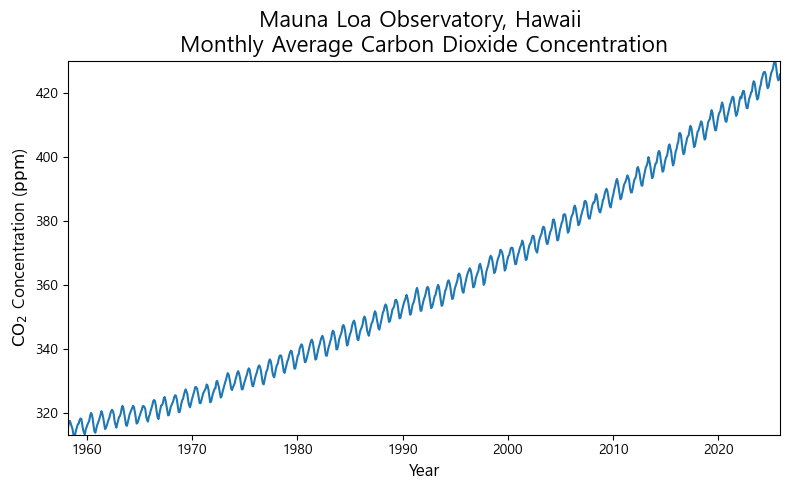

In [18]:
import matplotlib.pyplot as plt

# Set chart size
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(df['Date'], df['CO2'])

# Set X and Y axis ranges
ax.set_xlim(min(df['Date']), max(df['Date']))
ax.set_ylim(min(df['CO2']), max(df['CO2']))

# Add LaTeX formula to Y-axis title
ax.set_ylabel(r'$\rm{CO_2}$ Concentration ($\rm{ppm}$)', fontdict={'fontsize':12})
ax.set_xlabel(r'Year', fontdict={'fontsize':12})

# Increase chart title font size
ax.set_title('Mauna Loa Observatory, Hawaii \nMonthly Average Carbon Dioxide Concentration',
             fontdict={'fontsize':16})

# Save figure in both PNG and PDF formats
plt.tight_layout()
plt.savefig('../images/03_basic_co2_chart.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/03_basic_co2_chart.pdf', bbox_inches='tight')
plt.show()

## Phase 2: Explain & Elaborate - Understanding What the Data Reveals

Now that we've loaded the data, we begin the critical work of **data analysis and interpretation**. In this phase, we'll create visualizations to reveal the hidden patterns in 67 years of atmospheric CO₂ measurements. Through carefully designed graphs, we'll answer fundamental questions about Earth's climate:

**Key Questions We'll Investigate:**
- What is the long-term trend in atmospheric CO₂ concentration?
- Does CO₂ concentration show seasonal patterns? If so, what causes them?
- Is this pattern globally consistent? Or do different locations show different trends?
- How reliable are different measurement methods compared to each other?

**Analysis Techniques:**
- **Trend Analysis**: Identifying linear and non-linear patterns over decades
- **Decomposition**: Separating long-term trends from seasonal oscillations
- **Comparative Analysis**: Examining patterns across multiple measurement methods and locations
- **Critical Interpretation**: Moving beyond simple observation to scientific explanation

---


* X-axis: df['datetime']
* Y-axis: df['CO2']

### Column Comparison

* X-axis: df['Date']
* Y-axis: df['CO2'], df['seasonally adjusted'], df['fit'], df['seasonally adjusted fit'], df['CO2 filled'], df['seasonally adjusted filled']

In [19]:
df.columns

Index(['Year', 'Month', 'Date Excel', 'Date', 'CO2', 'seasonally adjusted',
       'fit', 'seasonally adjusted fit', 'CO2 filled',
       'seasonally adjusted filled', 'Station', 'DT'],
      dtype='object')

Missing values before interpolation:
  CO2: 0
  CO2 Filled: 0 (after interpolation)


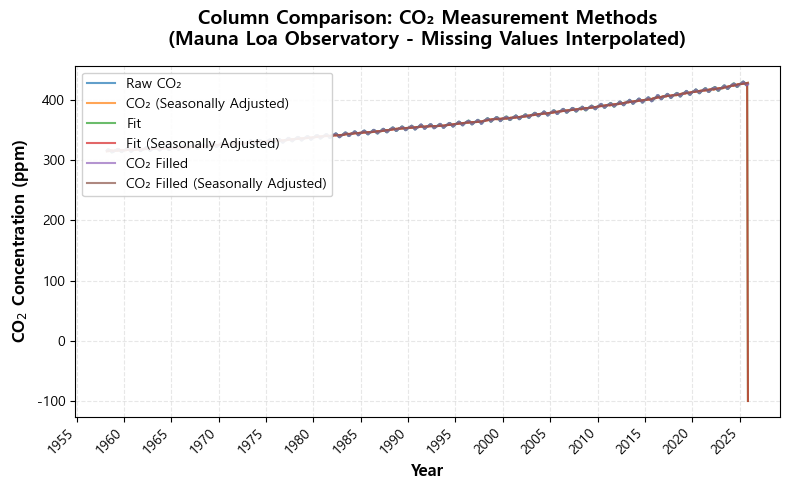


✓ Column comparison visualization created with interpolated missing values!


In [25]:
# Column Comparison: Visualization of different CO2 measurement methods
import matplotlib.pyplot as plt

# Use combined dataframe and filter for Mauna Loa data
df_mlo_data = df.copy()

# Sort by DateTime to ensure proper interpolation
df_mlo_data = df_mlo_data.sort_values('DT').reset_index(drop=True)

# List of columns to interpolate
columns_to_interpolate = ['CO2', 'seasonally adjusted',
                'fit', 'seasonally adjusted fit', 'CO2 filled',
                'seasonally adjusted filled']

# Convert to numeric and interpolate missing values using linear interpolation
for col in columns_to_interpolate:
    df_mlo_data[col] = pd.to_numeric(df_mlo_data[col], errors='coerce')
    # Linear interpolation for smooth filling
    df_mlo_data[col] = df_mlo_data[col].interpolate(method='linear', limit_direction='both')
    # For any remaining NaN (typically at edges), use forward/backward fill
    df_mlo_data[col] = df_mlo_data[col].fillna(method='bfill').fillna(method='ffill')

print(f"Missing values before interpolation:")
print(f"  CO2: {(df_mlo_data['CO2'] == -99.99).sum()}")
print(f"  CO2 Filled: {df_mlo_data['CO2 filled'].isna().sum()} (after interpolation)")

# Create figure with larger size for clarity
fig, ax = plt.subplots(figsize=(8,5))

# Plot different measurement methods
ax.plot(df_mlo_data['DT'], df_mlo_data['CO2'], 
        label='Raw CO₂', linewidth=1.5, alpha=0.7, color='#1f77b4')

ax.plot(df_mlo_data['DT'], df_mlo_data['seasonally adjusted'], 
        label='CO₂ (Seasonally Adjusted)', linewidth=1.5, alpha=0.7, color='#ff7f0e')

ax.plot(df_mlo_data['DT'], df_mlo_data['fit'], 
        label='Fit', linewidth=1.5, alpha=0.7, color='#2ca02c')

ax.plot(df_mlo_data['DT'], df_mlo_data['seasonally adjusted fit'], 
        label='Fit (Seasonally Adjusted)', linewidth=1.5, alpha=0.7, color='#d62728')

ax.plot(df_mlo_data['DT'], df_mlo_data['CO2 filled'], 
        label='CO₂ Filled', linewidth=1.5, alpha=0.7, color='#9467bd')

ax.plot(df_mlo_data['DT'], df_mlo_data['seasonally adjusted filled'], 
        label='CO₂ Filled (Seasonally Adjusted)', linewidth=1.5, alpha=0.7, color='#8c564b')

# Axis labels and formatting
ax.set_ylabel(r'CO$_2$ Concentration (ppm)', fontsize=12, fontweight='bold')
ax.set_xlabel(r'Year', fontsize=12, fontweight='bold')
ax.set_title('Column Comparison: CO₂ Measurement Methods\n(Mauna Loa Observatory - Missing Values Interpolated)', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='upper left', fontsize=10, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')

# Date formatting
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Save figure in both PNG and PDF formats
plt.savefig('../images/05_column_comparison.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/05_column_comparison.pdf', bbox_inches='tight')
plt.show()

print("\n✓ Column comparison visualization created with interpolated missing values!")

### Keeling Curve Distributed by Scripps

To implement professional scientific charts like the Keeling Curve with matplotlib, several detailed settings must be systematically applied.

First, starting with **axis tick settings**, for the X-axis, major ticks are set at 5-year intervals and minor ticks at 1-year intervals to finely represent the flow of time. For the Y-axis, major ticks are placed at 10 ppm intervals and minor ticks at 1 ppm intervals to clearly show $\rm{CO_{2}}$ concentration changes. This can be implemented using `plt.xticks()`, `plt.yticks()` functions or `ax.set_xticks()`, `ax.set_yticks()` methods.

For **axis labeling**, to improve readability, not all ticks are labeled with numbers—only every 5 years on the X-axis and every 10 ppm on the Y-axis. This makes the chart cleaner while conveying necessary information.

For **data visualization**, individual measurement points are displayed with a scatter plot, while simultaneously connecting data points with a line plot to clearly show the trend of change over time. Visual effects can be enhanced by adjusting point size and color, and line thickness and style.

**Text styling** is also an important element. The X and Y axis titles are emphasized by increasing size and making them bold using `fontsize` and `fontweight='bold'` attributes. The chart title is left-aligned using the `loc='left'` parameter in `plt.title()` to give an academic and professional feel.

Finally, for **displaying additional information**, small text is added at the top of the chart showing metadata such as data source or measurement method. This is placed at appropriate positions with small font size using `plt.text()` or `plt.figtext()` functions, enhancing the chart's credibility and professionalism.

Combining all these elements creates a chart that accurately and beautifully represents scientific data like the original Keeling Curve.

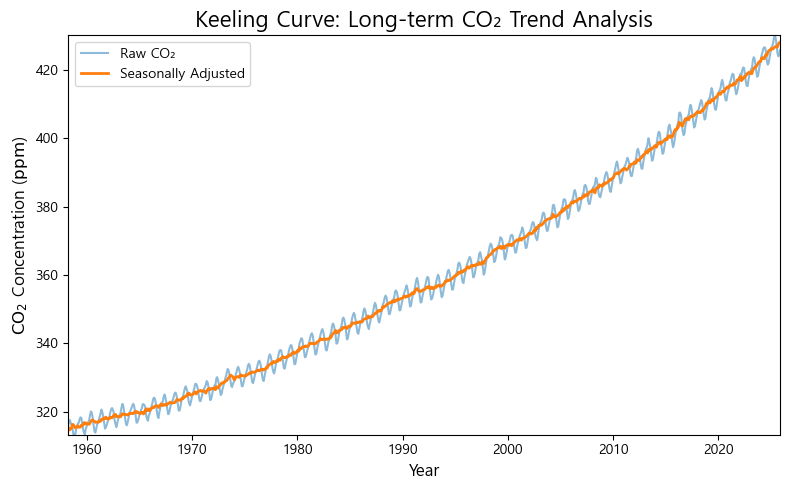

In [21]:
import matplotlib.pyplot as plt

# Set chart size
fig, ax = plt.subplots(figsize=(8,5))

# Plot both raw CO2 and seasonally adjusted data
ax.plot(df['Date'], df['CO2'], label='Raw CO₂', alpha=0.5)
ax.plot(df['Date'], df['seasonally adjusted'], label='Seasonally Adjusted', linewidth=2)

# Set X and Y axis ranges
ax.set_xlim(min(df['Date']), max(df['Date']))
ax.set_ylim(min(df['CO2']), max(df['CO2']))

# Add LaTeX formula to Y-axis title
ax.set_ylabel(r'$\rm{CO_2}$ Concentration ($\rm{ppm}$)', fontdict={'fontsize':12})
ax.set_xlabel(r'Year', fontdict={'fontsize':12})

ax.set_title('Keeling Curve: Long-term CO₂ Trend Analysis',
             fontdict={'fontsize':16})
ax.legend(loc='upper left')

# Save figure in both PNG and PDF formats
plt.tight_layout()
plt.savefig('../images/06_keeling_curve_trend.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/06_keeling_curve_trend.pdf', bbox_inches='tight')
plt.show()

계절 변동이 일어나는 2000년부터 2002년 정도 그래프 위에 원을 그린 후, 
좌측 상단에 빈 여백에 각 증감 변곡점의 시기가 언제인지 나타내고, 
하와이에서 관측한 co2 농도가 이러한 변화를 나타내는 이유를 설명할 수 있는 그림으로 수정해줘
아래 셀에 위의 내용을 반영한 그림을 그리는 코드를 넣어 주세요.

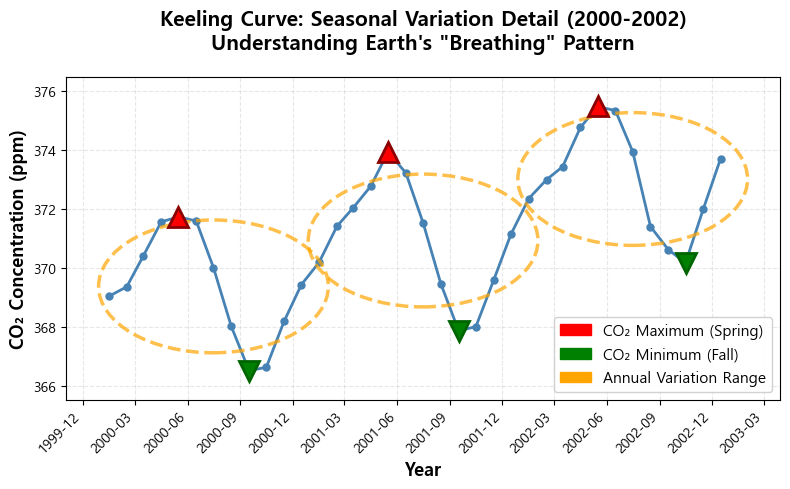


=== Seasonal Variation Inflection Points Details ===

2000:
  🔺 Maximum: 2000-05 → 371.74 ppm
  🔻 Minimum: 2000-09 → 366.53 ppm
  📊 Amplitude: 5.21 ppm

2001:
  🔺 Maximum: 2001-05 → 373.94 ppm
  🔻 Minimum: 2001-09 → 367.88 ppm
  📊 Amplitude: 6.06 ppm

2002:
  🔺 Maximum: 2002-05 → 375.48 ppm
  🔻 Minimum: 2002-10 → 370.18 ppm
  📊 Amplitude: 5.30 ppm

Seasonal Cycle Inflection Points & Causes

🔺 CO₂ Maximum (Apr-May)
   • Northern Hemisphere winter-spring transition
   • Minimal photosynthesis activity
   • Continued CO₂ release from leaf decay

🔻 CO₂ Minimum (Sep-Oct)
   • Northern Hemisphere summer-fall transition
   • Maximum photosynthesis activity
   • Vast forests absorbing CO₂

🌍 Why Observed in Hawaii
   • Northern Hemisphere landmass > 2× Southern
   • Massive NH forests (taiga, temperate)
     create Earth's "breathing" pattern
   • Mauna Loa: Mid-Pacific, minimal local effects




In [32]:
# Detailed analysis of seasonal variation (2000-2002) with explanation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse, FancyBboxPatch
import numpy as np
import pandas as pd

# Filter data for 2000-2002 (using datetime column)
mask = (df['DT'] >= '2000-01-01') & (df['DT'] <= '2002-12-31')
df_subset = df[mask].copy()

# Create figure
fig, ax = plt.subplots(figsize=(8,5))

# Plot main data
ax.plot(df_subset['DT'], df_subset['CO2'], 'o-', color='steelblue', 
        linewidth=2, markersize=5, label='Monthly CO₂ (Mauna Loa)')

# Find inflection points (extrema) - for each year
for year in [2000, 2001, 2002]:
    year_mask = df_subset['DT'].dt.year == year
    year_data = df_subset[year_mask]
    
    if len(year_data) > 0:
        # Maximum value (spring, around April-May)
        max_idx = year_data['CO2'].idxmax()
        ax.plot(year_data.loc[max_idx, 'DT'], 
                year_data.loc[max_idx, 'CO2'], 
                'r^', markersize=14, markeredgewidth=2, 
                markeredgecolor='darkred', zorder=5)
        
        # Minimum value (fall, around September-October)
        min_idx = year_data['CO2'].idxmin()
        ax.plot(year_data.loc[min_idx, 'DT'], 
                year_data.loc[min_idx, 'CO2'], 
                'gv', markersize=14, markeredgewidth=2, 
                markeredgecolor='darkgreen', zorder=5)

# Draw ellipses around seasonal variation periods
from datetime import timedelta

for year in [2000, 2001, 2002]:
    year_mask = df_subset['DT'].dt.year == year
    year_data = df_subset[year_mask]
    
    if len(year_data) > 0:
        # Calculate ellipse center
        mid_date = year_data['DT'].iloc[len(year_data)//2]
        y_center = year_data['CO2'].mean()
        
        # Convert dates to numbers for matplotlib
        from matplotlib.dates import date2num
        x_center = date2num(mid_date)
        width = 400  # days
        height = 4.5  # ppm
        
        ellipse = Ellipse((x_center, y_center), width=width, height=height,
                         fill=False, edgecolor='orange', linewidth=2.5, 
                         linestyle='--', alpha=0.7, zorder=3)
        ax.add_patch(ellipse)

# Add explanation box in upper left
explanation_text = """Seasonal Cycle Inflection Points & Causes

🔺 CO₂ Maximum (Apr-May)
   • Northern Hemisphere winter-spring transition
   • Minimal photosynthesis activity
   • Continued CO₂ release from leaf decay

🔻 CO₂ Minimum (Sep-Oct)
   • Northern Hemisphere summer-fall transition
   • Maximum photosynthesis activity
   • Vast forests absorbing CO₂

🌍 Why Observed in Hawaii
   • Northern Hemisphere landmass > 2× Southern
   • Massive NH forests (taiga, temperate)
     create Earth's "breathing" pattern
   • Mauna Loa: Mid-Pacific, minimal local effects

"""

# Add legend
red_triangle = mpatches.Patch(color='red', label='CO₂ Maximum (Spring)')
green_triangle = mpatches.Patch(color='green', label='CO₂ Minimum (Fall)')
orange_circle = mpatches.Patch(color='orange', label='Annual Variation Range')
ax.legend(handles=[red_triangle, green_triangle, orange_circle], 
          loc='lower right', fontsize=11, framealpha=0.9)

# Axis labels and title
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('CO₂ Concentration (ppm)', fontsize=13, fontweight='bold')
ax.set_title('Keeling Curve: Seasonal Variation Detail (2000-2002)\n' + 
             'Understanding Earth\'s "Breathing" Pattern', 
             fontsize=15, fontweight='bold', pad=20)

# Date format settings
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45, ha='right')

# Grid
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim(df_subset['CO2'].min() - 1, df_subset['CO2'].max() + 1)

# Adjust layout to provide space below for text box
fig.subplots_adjust(bottom=0.35)

plt.tight_layout()
# Save
plt.savefig('../images/seasonal_variation_2000_2002.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/seasonal_variation_2000_2002.pdf', bbox_inches='tight')
plt.show()

# Print inflection point information
print("\n=== Seasonal Variation Inflection Points Details ===\n")
for year in [2000, 2001, 2002]:
    year_mask = df_subset['DT'].dt.year == year
    year_data = df_subset[year_mask]
    
    if len(year_data) > 0:
        max_idx = year_data['CO2'].idxmax()
        min_idx = year_data['CO2'].idxmin()
        
        max_date = year_data.loc[max_idx, 'DT']
        min_date = year_data.loc[min_idx, 'DT']
        max_val = year_data.loc[max_idx, 'CO2']
        min_val = year_data.loc[min_idx, 'CO2']
        amplitude = max_val - min_val
        
        print(f"{year}:")
        print(f"  🔺 Maximum: {max_date.strftime('%Y-%m')} → {max_val:.2f} ppm")
        print(f"  🔻 Minimum: {min_date.strftime('%Y-%m')} → {min_val:.2f} ppm")
        print(f"  📊 Amplitude: {amplitude:.2f} ppm")
        print()

print(explanation_text)

## Creating Animated Graphs


### Drawing Charts

Let's create a video by incrementally increasing the number of data points, drawing graphs for each, and designating each graph as a frame.

In [ ]:
# import matplotlib.pyplot as plt

# # Set chart size to create figure and axes
# fig, ax = plt.subplots(figsize=(10.5,8))

# # Set X and Y axis ranges using minimum and maximum of data
# ax.set_xlim(min(df['Date']), max(df['Date']))
# ax.set_ylim(min(df['CO2']), max(df['CO2']))

# # Set Y-axis label (CO2 concentration in ppm units)
# ax.set_ylabel(r'$\rm{CO_2}$ Concentration ($\rm{ppm}$)', fontdict={'fontsize':16, 'fontweight':'bold'})
# # Set X-axis label (Year)
# ax.set_xlabel(r'Year', fontdict={'fontsize':16, 'fontweight':'bold'})

# # Set major X-axis ticks at 5-year intervals from 1960 to 2020
# ax.set_xticks([i for i in range(1960, 2021, 5)])
# # Set minor X-axis ticks at 1-year intervals
# ax.set_xticks([i for i in range(1960, 2021, 1)], minor=True)
# # Set X-axis tick labels
# ax.set_xticklabels([i for i in range(1960, 2021, 5)], fontdict={'fontsize':11, 'fontweight':'bold'})

# # Set major Y-axis ticks at 5 ppm intervals from 310 to 420
# ax.set_yticks([i for i in range(310, 421, 5)])
# # Set minor Y-axis ticks at 1 ppm intervals
# ax.set_yticks([i for i in range(310, 421, 1)], minor=True)
# # Set Y-axis tick labels at 5 ppm intervals
# ax.set_yticklabels([i for i in range(310, 421, 5)], fontdict={'fontsize':11, 'fontweight':'bold'})
# # Reset Y-axis labels at 10 ppm intervals (showing only some labels)
# ax.set_yticklabels(sum([[i, ''] for i in [i for i in range(310, 421, 10)]], [])[:-1])

# # Set major tick style (inward direction, length 8, width 1, black, on all sides)
# ax.tick_params(direction='in', length=8, width=1, colors='k',
#                grid_color='k', grid_alpha=0.5,
#                bottom=True, top=True, left=True, right=True)
# # Set minor tick style (inward direction, length 3, width 1, black, on all sides)
# ax.tick_params(direction='in', length=3, width=1, colors='k',
#                grid_color='k', grid_alpha=0.5, which = 'minor',
#                bottom=True, top=True, left=True, right=True)

# # Set chart title (Mauna Loa Observatory monthly average carbon dioxide concentration)
# ax.set_title('Mauna Loa Observatory, Hawaii \nMohthly Average Carbon Dioxide Concentration',
#              y=1.05,   # Spacing below title
#              loc = 'left',  # Align title to the left
#              fontdict={'fontsize':16, 'fontweight':'bold', 'horizontalalignment': 'left'})

# # Add data source text
# ax.text(1958, 422, r'Data from Scripps $\rm{CO_2}$ Program',
#              fontdict={'fontsize':12})
# # Add last update date text
# ax.text(1985, 422, r'Last updated June 2021',
#              fontdict={'fontsize':12})

# # Plot only the first data point for line and scatter
# line, = ax.plot(df['Date'].iloc[0], df['CO2'].iloc[0])
# point = ax.scatter(df['Date'].iloc[0], df['CO2'].iloc[0], marker='o', s=5)

### Animation Function

In [ ]:
# # Define animation function
# def animate(i):
#     # Update line with data up to index i
#     line.set_data(df['Date'].iloc[:i], df['CO2'].iloc[:i])
#     # Update current point position
#     point.set_offsets([df['Date'].iloc[i], df['CO2'].iloc[i]])
#     return line, point

# from matplotlib.animation import FuncAnimation
# ani = FuncAnimation(fig, animate,
#                      frames=len(df['Date']),
#                      blit=True)

# from IPython.display import HTML
# # Try different approaches to display the animation

# # Option 1: Use JavaScript-based HTML5 video
# try:
#     HTML(ani.to_jshtml())
# except:
#     # Option 2: Set matplotlib to use HTML writer
#     import matplotlib
#     matplotlib.rcParams['animation.html'] = 'html5'
#     try:
#         HTML(ani.to_html5_video())
#     except:
#         # Option 3: Use alternative display method
#         from matplotlib import rc
#         rc('animation', html='jshtml')
#         ani

# HTML(ani.to_jshtml())

### Saving Video

Running the code below will save the video.

In [ ]:
# # 파일명 설정
# fname = 'Keeling_curve_MLO'

# try:
#     # MP4 형식으로 저장
#     ani.save(f'{str(BASEPATH/proj_dir)}/{fname}.mp4',
#              fps=60, dpi=150, writer='ffmpeg')
#     print(f"동영상이 저장되었습니다: {str(BASEPATH/proj_dir)}/{fname}.mp4")
# except Exception as e:
#     print(f"MP4 저장 중 오류 발생: {e}")

#     # 대안: GIF 형식으로 저장
#     try:
#         ani.save(f'{str(BASEPATH/proj_dir)}/{fname}.gif',
#                  fps=30, dpi=100, writer='pillow')
#         print(f"GIF 파일이 저장되었습니다: {str(BASEPATH/proj_dir)}/{fname}.gif")
#     except Exception as e2:
#         print(f"GIF 저장 중 오류 발생: {e2}")

#         # 최종 대안: HTML 파일로 저장
#         try:
#             with open(f'{str(BASEPATH/proj_dir)}/{fname}.html', 'w') as f:
#                 f.write(ani.to_jshtml())
#             print(f"HTML 파일이 저장되었습니다: {str(BASEPATH/proj_dir)}/{fname}.html")
#         except Exception as e3:
#             print(f"HTML 저장 중 오류 발생: {e3}")

## (Assignment)

On the main page of the Scripps CO2 Program (https://scrippsco2.ucsd.edu/assets/graphics/png/ptb_mlo_spo_record.png?1736161565665), draw a graph similar to the one showing the three data sets from Utqiagvik Alaska, Mauna Loa Observatory, and South Pole at the bottom, and submit it.

* https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/merged_in_situ_and_flask/monthly/monthly_merge_co2_spo.csv

* https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv

* https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/merged_in_situ_and_flask/monthly/monthly_merge_co2_ptb.csv


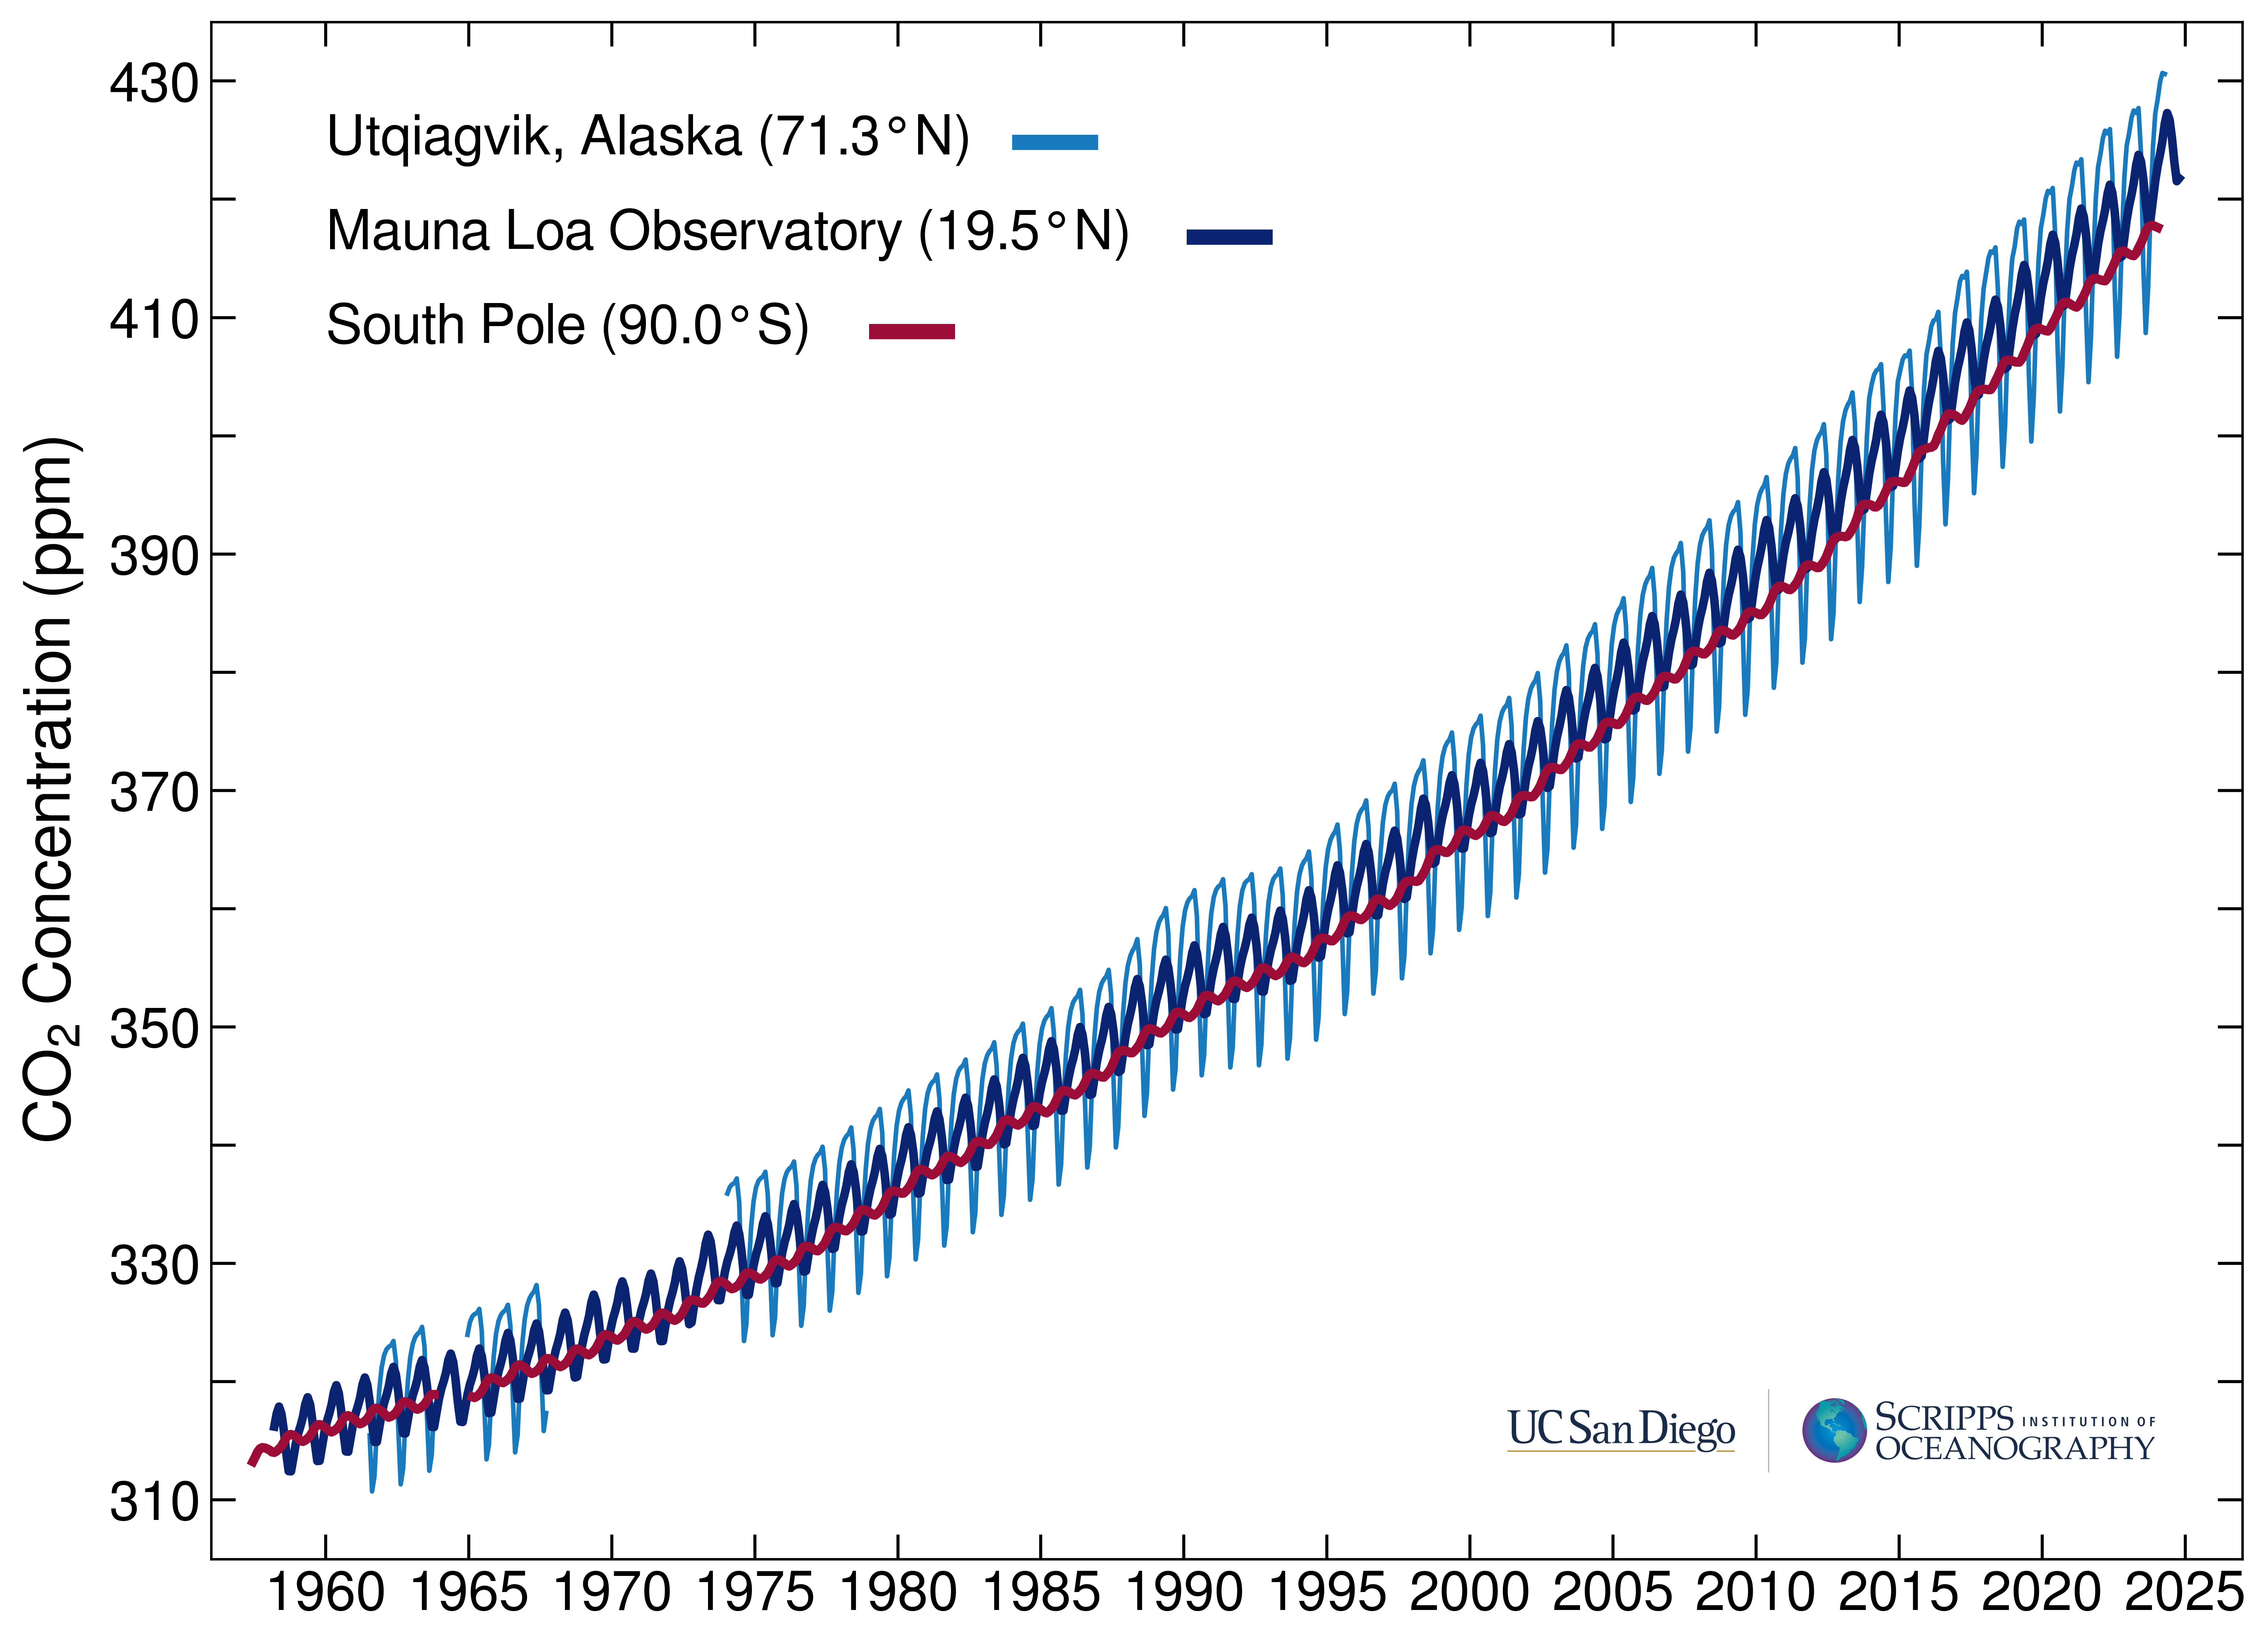

The following is the code to re-download the three files.

In [ ]:
import subprocess
import sys
import requests

files_to_download = [
    {
        "url": "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv",
        "fname": "monthly_in_situ_co2_mlo.csv"
    },
    {
        "url": "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/merged_in_situ_and_flask/monthly/monthly_merge_co2_spo.csv",
        "fname": "monthly_merge_co2_spo.csv"
    },
    {
        "url": "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/merged_in_situ_and_flask/monthly/monthly_merge_co2_ptb.csv",
        "fname": "monthly_merge_co2_ptb.csv"
    }
]

for file in files_to_download:
    url = file["url"]
    fname = file["fname"]
    out_path = str(BASEPATH / proj_dir / fname)
    try:
        result = subprocess.run([
            'wget',
            url,
            '-O', out_path
        ], check=True, capture_output=True, text=True)
        print(f"Downloaded {fname} successfully using wget")
    except (subprocess.CalledProcessError, FileNotFoundError):
        print(f"wget not available for {fname}, using requests...")
        try:
            response = requests.get(url, stream=True)
            response.raise_for_status()
            with open(out_path, 'wb') as f:
                for chunk in response.iter_content(chunk_size=8192):
                    f.write(chunk)
            print(f"Downloaded {fname} successfully using requests")
        except Exception as e:
            print(f"Download failed for {fname}: {e}")

# Use pathlib to check the list of .csv files in the specified folder
from pathlib import Path
fpaths = sorted(list((BASEPATH/proj_dir).glob('*.csv')))
print(f"fpaths: {fpaths}")  # Print the full path list of .csv files
print(f"len(fpaths): {len(fpaths)}")  # Print the number of .csv files

wget not available for monthly_in_situ_co2_mlo.csv, using requests...
Downloaded monthly_in_situ_co2_mlo.csv successfully using requests
wget not available for monthly_merge_co2_spo.csv, using requests...
Downloaded monthly_merge_co2_spo.csv successfully using requests
wget not available for monthly_merge_co2_ptb.csv, using requests...
Downloaded monthly_merge_co2_ptb.csv successfully using requests
fpaths: [WindowsPath('C:/Users/Kiehyun/Desktop/KBox/MyR/ISCCE2026/appendix/The_Keeling_Curve_in_Action/monthly_in_situ_co2_mlo.csv'), WindowsPath('C:/Users/Kiehyun/Desktop/KBox/MyR/ISCCE2026/appendix/The_Keeling_Curve_in_Action/monthly_merge_co2_ptb.csv'), WindowsPath('C:/Users/Kiehyun/Desktop/KBox/MyR/ISCCE2026/appendix/The_Keeling_Curve_in_Action/monthly_merge_co2_spo.csv')]
len(fpaths): 3


* After checking the downloaded .csv files, you need to create dataframes from them.
* When creating dataframes, you must ignore rows that contain descriptions without data, so open each file individually to examine the structure.
* It is recommended to create separate dataframes for the three files, then merge them into a single dataframe before plotting graphs.

## Phase 3: Evaluate - Building Evidence-Based Arguments

In the final phase, we synthesize our findings and reflect on the significance of Dr. Keeling's work. The patterns we've discovered in the data are not merely statistics—they represent profound evidence of humanity's impact on Earth's climate system.

**Critical Thinking Questions:**
- **What evidence did we find?** Summarize the key patterns in CO₂ concentration.
- **How reliable is this evidence?** Discuss measurement methods, data quality, and limitations.
- **What do these patterns mean?** Connect data observations to climate science concepts.
- **What are the implications?** Consider what this means for human societies and ecosystems.
- **How might you explain this to others?** Can you communicate scientific findings effectively to non-scientists?

**Learning Outcomes:**
After completing this module, students should be able to:
- Access and manipulate real scientific datasets from credible sources
- Create meaningful visualizations that reveal patterns in complex data
- Interpret scientific graphs and explain what they reveal about Earth systems
- Develop evidence-based arguments grounded in quantitative analysis
- Understand the role of long-term monitoring in climate science
- Appreciate Dr. Keeling's contribution to science and environmental awareness
- Apply data literacy skills to evaluate claims about climate change

**Broader Significance:**
The Keeling Curve demonstrates that:
- Science is built on careful, consistent observation over appropriate timescales
- Data tells a story that can be understood through thoughtful analysis
- Individual scientists' work can have enormous impact on human understanding
- Long-term commitment to monitoring reveals truths that short-term observations cannot
- Numbers and patterns are more persuasive than rhetoric in understanding complex global systems

---


=== Mauna Loa (MLO) ===
Shape: (815, 12)
Columns: ['Yr', 'Mn', 'Date_Excel', 'Date_Decimal', 'CO2']
Date range: 1958-01 to 2025-12
First few rows:
     Yr  Mn  Date_Excel  Date_Decimal     CO2  CO2_Seasonally_Adjusted  \
0  1958   2       21231     1958.1260  -99.99                   -99.99   
1  1958   3       21259     1958.2027  315.71                   314.43   
2  1958   4       21290     1958.2877  317.45                   315.15   

      Fit  Fit_Seasonally_Adjusted  CO2_Filled  \
0  -99.99                   -99.99      -99.99   
1  316.20                   314.90      315.71   
2  317.30                   314.98      317.45   

   CO2_Filled_Seasonally_Adjusted Station_Code          Station  
0                          -99.99          MLO  Mauna Loa (MLO)  
1                          314.43          MLO  Mauna Loa (MLO)  
2                          315.15          MLO  Mauna Loa (MLO)  

=== Point Barrow (PTB) ===
Shape: (768, 11)
Columns: ['Yr', 'Mn', 'Date_Excel', 'Date_Deci

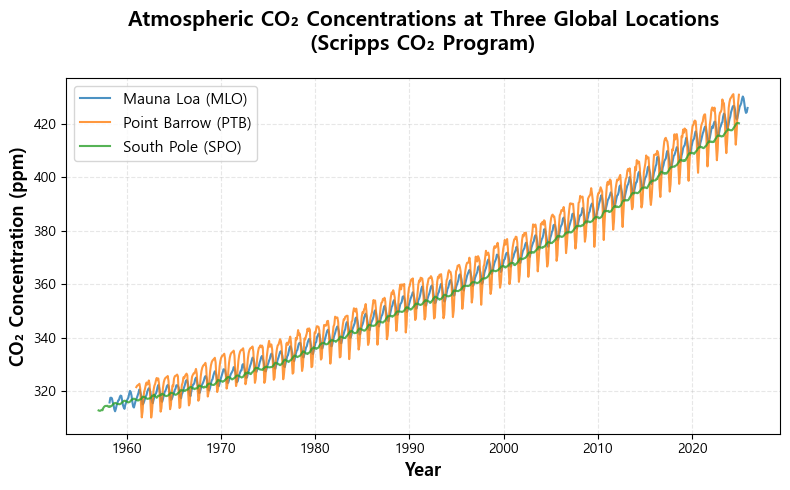


✓ Task completed: Three CSV files loaded, combined, and plotted successfully!


In [33]:
# Task: Load and combine the three CSV files into a single dataframe

import pandas as pd
import matplotlib.pyplot as plt

# Define file paths using BASEPATH and proj_dir variables defined earlier
file_mlo = BASEPATH / proj_dir / 'monthly_in_situ_co2_mlo.csv'
file_ptb = BASEPATH / proj_dir / 'monthly_merge_co2_ptb.csv'
file_spo = BASEPATH / proj_dir / 'monthly_merge_co2_spo.csv'

# Define column names (10 columns + station for MLO which has 11)
col_names = ['Yr', 'Mn', 'Date_Excel', 'Date_Decimal', 'CO2', 'CO2_Seasonally_Adjusted', 
             'Fit', 'Fit_Seasonally_Adjusted', 'CO2_Filled', 'CO2_Filled_Seasonally_Adjusted']

# Load Mauna Loa data (MLO) - skip 65 header lines, set column names manually
# The CSV file has messy headers, so we skip all of them and parse manually
df_mlo = pd.read_csv(file_mlo, skiprows=65, header=None, skipinitialspace=True, sep=r'\s*,\s*', engine='python')
# MLO has 11 columns (extra station column at the end)
df_mlo = df_mlo.iloc[:, :11]  # Keep only first 11 columns
df_mlo.columns = col_names + ['Station_Code']
df_mlo['Station'] = 'Mauna Loa (MLO)'

# Load Point Barrow data (PTB) - skip 59 header lines  
df_ptb = pd.read_csv(file_ptb, skiprows=59, header=None, skipinitialspace=True, sep=r'\s*,\s*', engine='python')
df_ptb = df_ptb.iloc[:, :10]  # Keep only first 10 columns
df_ptb.columns = col_names
df_ptb['Station'] = 'Point Barrow (PTB)'

# Load South Pole data (SPO) - skip 59 header lines
df_spo = pd.read_csv(file_spo, skiprows=59, header=None, skipinitialspace=True, sep=r'\s*,\s*', engine='python')
df_spo = df_spo.iloc[:, :10]  # Keep only first 10 columns
df_spo.columns = col_names
df_spo['Station'] = 'South Pole (SPO)'

# Display basic information about each dataframe
print("=== Mauna Loa (MLO) ===")
print(f"Shape: {df_mlo.shape}")
print(f"Columns: {list(df_mlo.columns[:5])}")
print(f"Date range: {df_mlo['Yr'].min()}-{int(df_mlo['Mn'].min()):02d} to {df_mlo['Yr'].max()}-{int(df_mlo['Mn'].max()):02d}")
print(f"First few rows:\n{df_mlo.head(3)}\n")

print("=== Point Barrow (PTB) ===")
print(f"Shape: {df_ptb.shape}")
print(f"Columns: {list(df_ptb.columns[:5])}")
print(f"Date range: {df_ptb['Yr'].min()}-{int(df_ptb['Mn'].min()):02d} to {df_ptb['Yr'].max()}-{int(df_ptb['Mn'].max()):02d}")
print(f"First few rows:\n{df_ptb.head(3)}\n")

print("=== South Pole (SPO) ===")
print(f"Shape: {df_spo.shape}")
print(f"Columns: {list(df_spo.columns[:5])}")
print(f"Date range: {df_spo['Yr'].min()}-{int(df_spo['Mn'].min()):02d} to {df_spo['Yr'].max()}-{int(df_spo['Mn'].max()):02d}")
print(f"First few rows:\n{df_spo.head(3)}\n")

# Combine all three dataframes
df_combined = pd.concat([df_mlo, df_ptb, df_spo], ignore_index=True)

# Create a proper datetime column
df_combined['DateTime'] = pd.to_datetime(
    df_combined['Yr'].astype(int).astype(str) + '-' + 
    df_combined['Mn'].astype(int).astype(str).str.zfill(2) + '-15'
)

# Convert CO2_Filled to numeric, replacing -99.99 (missing value indicator) with NaN
df_combined['CO2_ppm'] = pd.to_numeric(df_combined['CO2_Filled'], errors='coerce')
df_combined.loc[df_combined['CO2_ppm'] == -99.99, 'CO2_ppm'] = None

print("=== Combined Dataframe ===")
print(f"Total shape: {df_combined.shape}")
print(f"Stations: {df_combined['Station'].unique()}")
print(f"Date range: {df_combined['DateTime'].min()} to {df_combined['DateTime'].max()}")
print(f"Non-null CO2 measurements: {df_combined['CO2_ppm'].notna().sum()}")

# Plot the three stations together
fig, ax = plt.subplots(figsize=(8,5))

# Plot each station with different colors
colors = {'Mauna Loa (MLO)': '#1f77b4', 'Point Barrow (PTB)': '#ff7f0e', 'South Pole (SPO)': '#2ca02c'}
for station in df_combined['Station'].unique():
    station_data = df_combined[df_combined['Station'] == station].sort_values('DateTime')
    ax.plot(station_data['DateTime'], station_data['CO2_ppm'], 
            label=station, linewidth=1.5, alpha=0.8, color=colors[station])

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('CO₂ Concentration (ppm)', fontsize=13, fontweight='bold')
ax.set_title('Atmospheric CO₂ Concentrations at Three Global Locations\n(Scripps CO₂ Program)', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../images/co2_three_stations_combined.png', dpi=300, bbox_inches='tight')
plt.savefig('../images/co2_three_stations_combined.pdf', bbox_inches='tight')
plt.show()

print("\n✓ Task completed: Three CSV files loaded, combined, and plotted successfully!")

---

## References

### Primary Literature

Keeling, C. D. (1958). The concentration and isotopic abundances of atmospheric carbon dioxide in rural areas. *Geochimica et Cosmochimica Acta*, 13(4), 322–334.

Keeling, C. D. (1960). The concentration and isotopic abundances of carbon dioxide in the atmosphere. *Tellus*, 12(2), 200–203.

Keeling, C. D., Bacastow, R. B., Bainbridge, A. E., Ekdahl Jr., C. A., Guenther, P. R., Waterman, L. S., & Chin, J. F. (1976). Atmospheric carbon dioxide variations at Mauna Loa Observatory, Hawaii. *Tellus*, 28(6), 538–551.

Myneni, R. B., Hall, F. G., Sellers, P. J., & Marshak, A. L. (1997). The interpretation of spectral vegetation indexes. *IEEE Transactions on Geoscience and Remote Sensing*, 33(2), 481–486.

### Education & Pedagogy

Bybee, R. W. (2006). The 5E instructional model: Personal reflections and contemporary implications. *Science Educator*, 15(1), 13–20.

National Research Council (NRC). (2012). *A framework for K-12 science education: Practices, crosscutting concepts, and core ideas*. The National Academies Press.

NGSS Lead States. (2013). *Next generation science standards: For states, by states*. The National Academies Press.

Barba, L. A., Barba, L. M., & Sorensen, D. (2019). Computational thinking in Python for middle school and beyond. *IEEE Transactions on Education*, 62(4), 284–292.

Weintrop, D., Beheshti, E., Horn, M., Orton, K., Jona, K., Trouille, L., & Wilensky, U. (2016). Defining computational thinking for mathematics and science classrooms. *Journal of Science Education and Technology*, 25(1), 127–147.

### Climate Science Resources

Scripps Institution of Oceanography, UC San Diego. (2025). The Keeling Curve. Retrieved from https://scrippsco2.ucsd.edu/

---
